In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def show_image(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title("Final Image")
    axes[1].axis("off")

    plt.show()

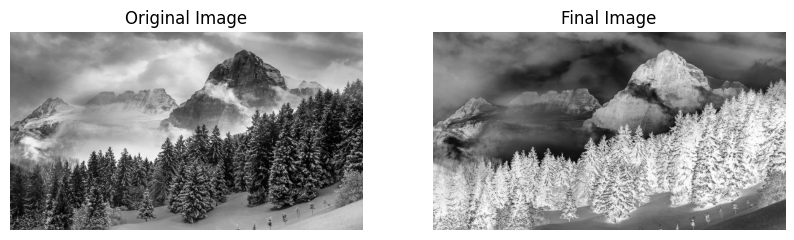

In [31]:
# Read the image
image = cv2.imread("images/Task1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display in matplotlib

# Invert the colors to simulate a nighttime effect
inverted_image = cv2.bitwise_not(image)

show_image(image, inverted_image)

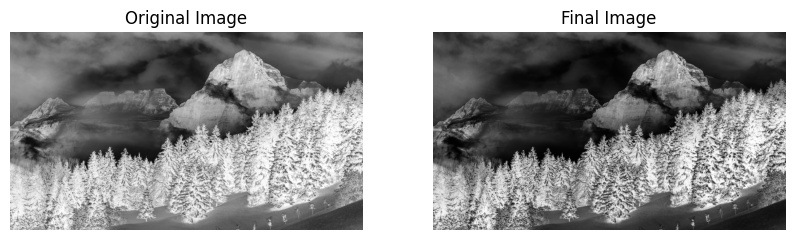

In [32]:
# gamma correction: power transform with convention
# - gamma > 1 => brighter
#   - 1/gamma < 1 => log transform, dark fleshed white compressed
# - gamma < 1 => darker
#   - 1/gamma > 1 => power transform, dark compressed white fleshed
gamma = 0.6
inv_gamma = 1.0 / gamma

# look up table:    for every possible intensity i of the image, set
#                   table[i] = gamma(i) = AV^gamma, V usually [0,1]
table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
adjusted_image = cv2.LUT(inverted_image, table)

show_image(inverted_image, adjusted_image)

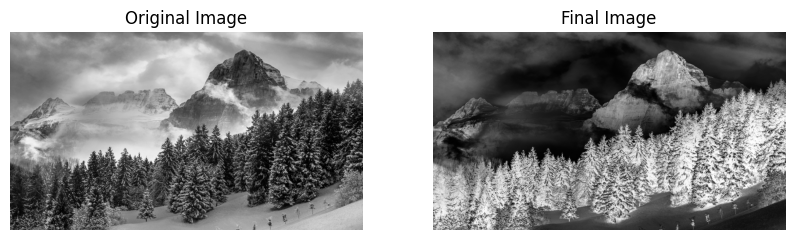

In [33]:
# Show the final result

show_image(image, adjusted_image)